In [8]:
import numpy as np
import urllib, os
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, '../../../')
from VisionClient import *

OUTPUT_DIR = '/tmp/classification_result/';
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    
BATCH_SIZE = 7; # Number of images to process in one call
DEBUG = 0;

In [2]:
label_file = open('../data/ilsvrc12/synset_words.txt', 'r')
labels = label_file.readlines();

In [3]:
client = VisionClient('http://ec2-54-157-50-137.compute-1.amazonaws.com:5000');
image_collection_url = 'http://cogrob-dell-desktop.cc.gt.atl.ga.us/data/2015-07-02-12-13-08/'
image_collection_rgb_url = image_collection_url + 'rgb.txt';
urllib.urlretrieve(image_collection_rgb_url, "/tmp/rgb.txt")
image_file = open("/tmp/rgb.txt", 'r');
images = image_file.readlines();    

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

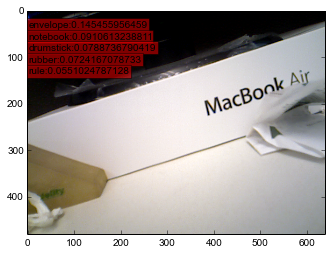

In [10]:
image_count = 0;
batch_size = 0;
image_urls = [];
for i in images:        
    image_id =  i.split(' ')[1];
    image_url = image_collection_url + image_id;
    image_urls.append(image_url);    
    
    if DEBUG!=0:
        print 'Running on image: ', image_url,                       
    
    # Process batch size images at once
    if batch_size < BATCH_SIZE:
        batch_size = batch_size +1
        continue;        

    # Classify
    prediction_list = client.classify(image_urls);
    
    # Plot
    for j in range(0, BATCH_SIZE):
        
        prediction = prediction_list[str(j)];
        top_class = prediction['top_class']
        top_label = labels[top_class]
        #print 'Top Class: ', top_class, '\nTop Label: ', top_label
    
        # List of indices
        predictions = np.array(prediction['list']) # Get the list of predictions
        sorted_indices =  np.argsort(predictions); # Sorts in ascending order
        sorted_indices = sorted_indices[::-1]; # Reverse it
    
        # Show it
        #for i in range(0,10):
        #    print 'Class: ', sorted_indices[i], '\tScore: ', predictions[sorted_indices[i]], '  Label: ', labels[sorted_indices[i]],
        
        try:
            urllib.urlretrieve(image_url, "/tmp/image.jpg")
        except:
            print '[ERROR] Invalid URL'         
        im = plt.imread("/tmp/image.jpg")
        fig = plt.figure(1);
        plt.clf();
        ax = plt.axes();

        count = 1;
        for i in range(0,5):
            label_text = labels[sorted_indices[i]].split(',')[0].split(' ')[1].strip('\n')
            text = label_text + ':' + str(predictions[sorted_indices[i]]);
            ax.text(3, count*25 + 10, text, 
            bbox={'facecolor':'red', 'alpha':0.5})   
            count = count + 1;

        if predictions[sorted_indices[0]] > 0.3:
            fig.suptitle(top_label, fontsize=14, fontweight='bold')
        
        plt.imshow(im)
    
        # Save it
        output_image = "%05d" %image_count
        image_name = OUTPUT_DIR + output_image + '.jpg';
        savefig(image_name)
    
        # Counter
        image_count = image_count + 1; 
        
        print '.',
    
    # Reset batch size
    batch_size = 0;
    
    # Reset image_urls list
    image_urls = [];


In [ ]:
filename = OUTPUT_DIR + '/output.mov';
command = 'avconv -framerate 10 -f image2 -i ' + OUTPUT_DIR + '%05d.jpg -c:v h264 ' + filename

try:
    os.remove(filename)
except OSError:
    pass

print command
os.system(command)